# Modelo de Clasificación - Multi-clases (Avanzado)
**260524**

In [6]:
#!pip install matplotlib

In [7]:
# Importar las bibliotecas necesarias
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [8]:
# Paso 1: Crear un conjunto de datos de clasificación multiclase con más características informativas
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=3, random_state=42)

In [9]:
# Paso 2: Dividir los datos en entrenamiento, prueba y validación (80% para entrenamiento/validación y 20% para prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# Paso 3: Crear el Pipeline para ambos modelos (Regresión Logística y Random Forest)
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar los datos
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', OneVsRestClassifier(RandomForestClassifier()))
])

In [11]:
# Paso 4: Configurar la búsqueda de hiperparámetros para ambos modelos
param_grid_logreg = {'clf__estimator__C': [0.01, 0.1, 1, 10, 100]}
param_grid_rf = {
    'clf__estimator__n_estimators': [50, 100, 200],
    'clf__estimator__max_depth': [None, 10, 20, 30],
    'clf__estimator__min_samples_split': [2, 5, 10]
}

In [14]:
# Paso 5: Validar los hiperparámetros usando el conjunto de validación
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, scoring='roc_auc_ovr')
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc_ovr')

# Entrenar y optimizar ambos modelos con el conjunto de entrenamiento y validación
grid_search_logreg.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        OneVsRestClassifier(estimator=RandomForestClassifier()))]),
             param_grid={'clf__estimator__max_depth': [None, 10, 20, 30],
                         'clf__estimator__min_samples_split': [2, 5, 10],
                         'clf__estimator__n_estimators': [50, 100, 200]},
             scoring='roc_auc_ovr')

In [15]:
# Paso 6: Evaluar el mejor modelo de cada uno en el conjunto de validación
best_logreg = grid_search_logreg.best_estimator_
best_rf = grid_search_rf.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print(f"Best Parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Logistic Regression: {'clf__estimator__C': 100}
Best Parameters for Random Forest: {'clf__estimator__max_depth': 20, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 100}


In [17]:
# Paso 7: Comparar el rendimiento en el conjunto de validación
y_pred_logreg_val = best_logreg.predict(X_val)
y_pred_rf_val = best_rf.predict(X_val)

# Calcular la exactitud para ambos modelos
accuracy_logreg_val = accuracy_score(y_val, y_pred_logreg_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f"Validation Accuracy for Logistic Regression: {accuracy_logreg_val:.2f}")
print(f"Validation Accuracy for Random Forest: {accuracy_rf_val:.2f}")

Validation Accuracy for Logistic Regression: 0.59
Validation Accuracy for Random Forest: 0.81


In [18]:
# Paso 8: Evaluar el rendimiento final en el conjunto de prueba
y_pred_logreg_test = best_logreg.predict(X_test)
y_pred_rf_test = best_rf.predict(X_test)

# Calcular la exactitud para ambos modelos en el conjunto de prueba
accuracy_logreg_test = accuracy_score(y_test, y_pred_logreg_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print(f"Test Accuracy for Logistic Regression: {accuracy_logreg_test:.2f}")
print(f"Test Accuracy for Random Forest: {accuracy_rf_test:.2f}")

Test Accuracy for Logistic Regression: 0.65
Test Accuracy for Random Forest: 0.86



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.56      0.72      0.63        25
           1       0.71      0.72      0.72        40
           2       0.67      0.51      0.58        35

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.64       100
weighted avg       0.66      0.65      0.65       100


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.89      0.82      0.86        40
           2       0.91      0.83      0.87        35

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



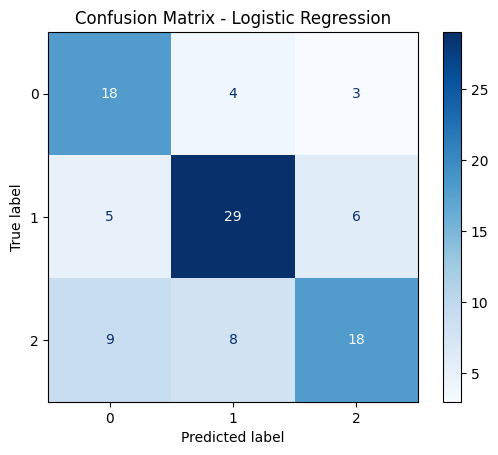

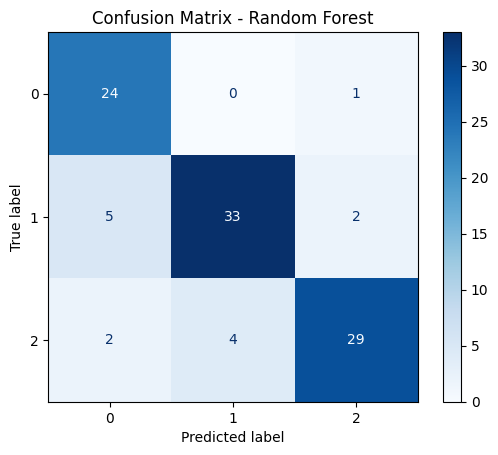

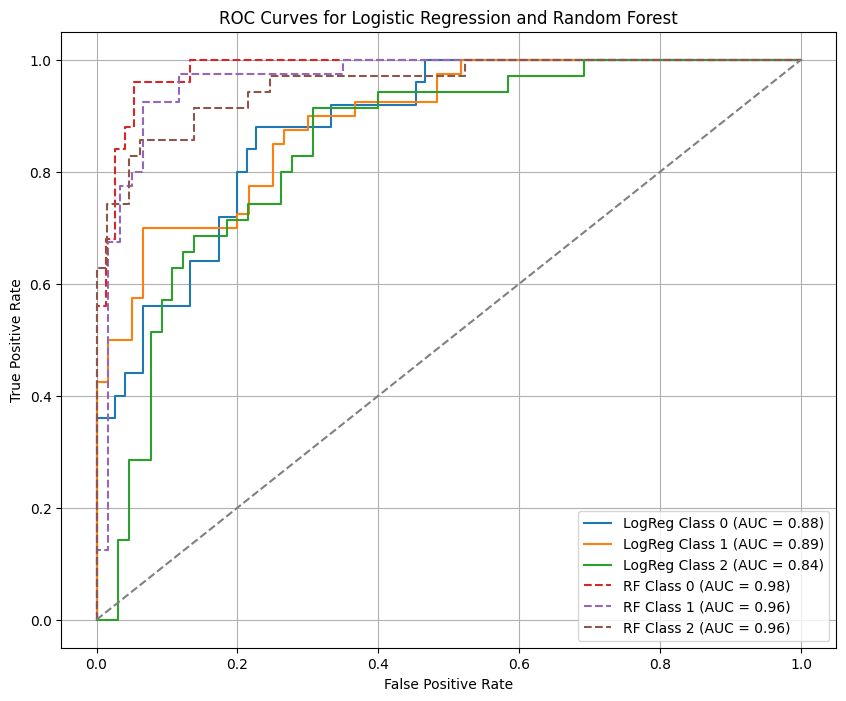

In [19]:
# Paso 9: Evaluar y visualizar la matriz de confusión para ambos modelos
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)

print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_logreg_test))

print("\nClassification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf_test))

# Visualizar la matriz de confusión
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg)
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Paso 10: AUC-ROC Score y Curva ROC para ambos modelos
# Probabilidades de predicción para calcular el ROC AUC
y_prob_logreg = best_logreg.predict_proba(X_test)
y_prob_rf = best_rf.predict_proba(X_test)

# Graficar el ROC curve para cada clase y modelo
plt.figure(figsize=(10, 8))

# Logistic Regression ROC-AUC
for i in range(y_prob_logreg.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_logreg[:, i])
    auc = roc_auc_score(y_test == i, y_prob_logreg[:, i])
    plt.plot(fpr, tpr, label=f"LogReg Class {i} (AUC = {auc:.2f})")

# Random Forest ROC-AUC
for i in range(y_prob_rf.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_rf[:, i])
    auc = roc_auc_score(y_test == i, y_prob_rf[:, i])
    plt.plot(fpr, tpr, linestyle='--', label=f"RF Class {i} (AUC = {auc:.2f})")

# Dibujar la línea diagonal que representa un clasificador aleatorio
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression and Random Forest")
plt.legend()
plt.grid(True)
plt.show()
